<!-- <img src="./obrazek.png" alt="obrazek" width="900" /> -->
<img src="https://drive.google.com/uc?id=16dXZdH0UexIBEzQbP6IXG3t7t-ojXDNg" width="900"> 


In [9]:
from IPython.display import display as disp
from IPython.display import Math as math

In [10]:
import numpy as np
from sympy import symbols, cos, sin
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [11]:
# sympy.physics : https://stackoverflow.com/questions/25346132/is-it-possible-to-implement-newtons-dot-notation-or-lagranges-prime-notation
# Newtown notation for derivatives (dot notation)
from sympy.physics.mechanics import dynamicsymbols, init_vprinting

init_vprinting() 

# Implicitly creates r, d as functions of time
# a, b = dynamicsymbols('r d')    

In [12]:
from sympy import print_latex

In [13]:
from IPython.display import Markdown as md

In [14]:
m_r, m_p, m_c, M, gamma, b, g, J_cm, L_c, L_p, L = symbols('m_r m_p m_c M gamma b g J_{cm} L_c L_p, L')
t = symbols('t')

# Functions
x, y, u, xcm, ycm = symbols('x y u x_{cm} y_{cm}', cls=smp.Function)
theta = symbols('theta', cls=smp.Function)

# Disturbances
D = smp.symbols('D', cls=smp.Symbol)
alpha = smp.symbols('alpha', cls=smp.Function)
alpha = alpha(t)

x = x(t)
y = y(t)
u = u(t)
xcm = xcm(t)
ycm = ycm(t)
theta = theta(t)

# Other
Rx, Ry = symbols('R_x R_y')

# Derivatives
Dx = x.diff(t, 1)
DDx = x.diff(t, 2)

## <b>1. Trolley forces
$M\ddot{x} = F - F_f - R_x$\
$F = u$\
Friction model:\
$F_f = b\dot{x}$

In [15]:
F_f = b*Dx

In [16]:
lhs = M*DDx
rhs = u - F_f - Rx

f_trolley_eq = smp.Eq(lhs=lhs, rhs=rhs)

disp(f_trolley_eq)

## <b> L: Distance from rotation axis to center of mass of the pendulum
$L = L_{cm} = \frac{m_cL_c + m_pL_p}{m_c+m_p} = \frac{m_cL_c + m_pL_p}{m_r}$\
$m_r = m_c + m_p$

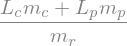

In [17]:
L_cm_ramienia = (m_c*L_c + m_p*L_p) / (m_r) 
L_cm_ramienia

## <b>2. Pendulum center of mass position
$P_{cm} = (x_{cm}, y_{cm})$\
$x_{cm} = x + L\sin(\theta)$\
$y_{cm} = L\cos(\theta)$

In [18]:
xcm = x+L*sin(theta)
ycm = L*cos(theta)

disp(xcm)
disp(ycm)

## <b>3. Pendulum forces
$m\ddot{x}_{cm} = R_x + D\cos(\alpha)$\
$m\ddot{y}_{cm} = R_y - m_rg - D\sin(\alpha)$


In [19]:
Dx_cm = xcm.diff(t, 1)
DDx_cm = xcm.diff(t, 2)
DDy_cm = ycm.diff(t, 2)

Rx_expr = m_r * DDx_cm - D*cos(alpha)
Ry_expr = m_r * DDy_cm + m_r*g + D*sin(alpha)

# print('Rx EXPR:')
# disp(Rx_expr)
disp(smp.Eq(Rx, Rx_expr).doit().expand())
# print('RX LATEX CODE:')
# print_latex(Rx_res)

# print('Ry EXPR:')
# disp(Ry_expr)
disp(smp.Eq(Ry, Ry_expr).doit().expand())
# print('RY LATEX CODE')
# print_latex(Ry_res)


In [ ]:
xcm

## <b> Pendulum torques around its center os mass
$J_{cm}\ddot{\theta} = LR_y\sin(\theta) - LR_x\cos(\theta) - \gamma\ddot{\theta} + m_c g \sin(\theta)[L_c-L] - m_p g\sin(\theta)[L-L_p] + D\cos(\frac{\pi}{4} - \alpha)$


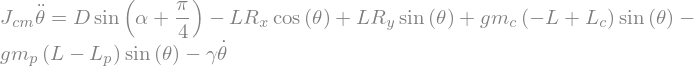

In [20]:
Dtheta = theta.diff(t, 1)
DDtheta = theta.diff(t, 2)

lhs = J_cm*DDtheta
rhs = L*Ry*sin(theta) - L*Rx*cos(theta) - gamma*Dtheta + m_c*g*sin(theta)*(L_c-L) - m_p*g*sin(theta)*(L-L_p) + D*cos(smp.pi/4 - alpha)
bilans_momentow = smp.Eq(lhs=lhs, rhs=rhs)
bilans_momentow

Some results
-----------------------------------
1. f_trolley_eq


2. bilans_momentów


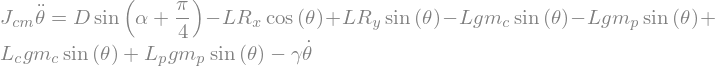

3. Reaction forces


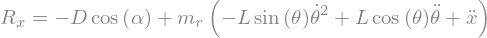

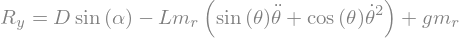

In [21]:
print('Some results')
print('-----------------------------------')
print('1. f_trolley_eq') 
f_trolley_eq = f_trolley_eq.expand()
disp(f_trolley_eq)
print('2. bilans_momentów')
bilans_momentow = bilans_momentow.expand()
disp(bilans_momentow)
print('3. Reaction forces')
disp(smp.Eq(Rx, Rx_expr))
disp(smp.Eq(Ry, Ry_expr))

In [22]:
f_trolley_eq = f_trolley_eq.subs([(Rx, Rx_expr),
                                  (Ry, Ry_expr)])
f_trolley_eq.expand()

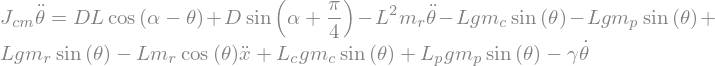

In [23]:
bilans_momentow = bilans_momentow.subs([(Rx, Rx_expr),
                                        (Ry, Ry_expr)])
bilans_momentow.simplify().expand()

Torques expanded:


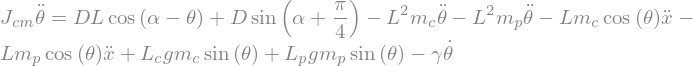

In [24]:
print('Torques expanded:')
bilans_momentow.subs(m_r, m_c+m_p).expand().simplify()

In [25]:
J_cm_calosciowe = smp.Rational(1, 3)*m_p*(2*L_p)**2 + m_c*L_c**2 - m_r*L**2

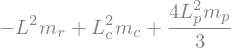

In [26]:
J_cm_calosciowe

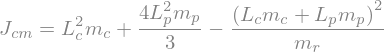

In [27]:
J_cm_calosciowe = J_cm_calosciowe.subs(L, L_cm_ramienia)

smp.Eq(
    J_cm,
    J_cm_calosciowe
)

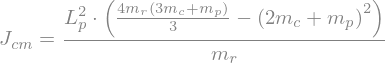

In [28]:
# Lc = 2Lp
J_cm_calosciowe_mc_na_koncu = J_cm_calosciowe.subs(L_c, 2*L_p)
smp.Eq(
    J_cm,
    J_cm_calosciowe_mc_na_koncu
).simplify()

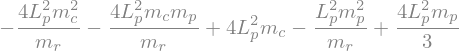

In [29]:
J_cm_calosciowe_mc_na_koncu.expand()

## <b> Results

\begin{equation}
    (M + m_r) \ddot{x} + Lm_rcos(\theta)\ddot{\theta} + b\dot{x}-Lm_r\sin(\theta)\dot{\theta}^2 
    = u + D\cos(\alpha)
\end{equation}

\begin{equation}
    (J_{cm} + m_rL^2)\ddot{\theta} + m_rL\cos(\theta)\ddot{x} + \gamma\dot{\theta} - m_rgL\sin(\theta)
    = DL\cos(\alpha-\theta) + D\sin(\alpha + \frac{\pi}{4})
\end{equation}


\begin{equation}
    \begin{split}
        & L = \frac{L_pm_p + L_cm_c}{m_r} \\
        & m_r = m_p + m_c \\
        & m_r = m_p + m_c \\
        & M_t = M+m_r \\
        & J_t = J_{cm} + m_rL^2 \\
        & J_{cm} = \frac{4}{3}m_p L_p^2 + m_cL_c^2 -L^2m_r 
    \end{split}
\end{equation}

    
\begin{equation}
    \begin{bmatrix}
        M_t & m_rL\cos(\theta)\\
        m_rL\cos(\theta) & J_t 
    \end{bmatrix}
    \begin{bmatrix}
        \ddot{x}\\
        \ddot{\theta}
    \end{bmatrix}
    +
    \begin{bmatrix}
        b\dot{x} - Lm_r\sin(\theta)\dot{\theta}^2\\
        \gamma\dot{\theta} - m_r g L\sin(\theta)
    \end{bmatrix}
    =
    \begin{bmatrix}
        u\\
        0
    \end{bmatrix}
    +
    \begin{bmatrix}
        \cos(\alpha)\\
        L\cos(\alpha-\theta) + \sin(\alpha + \frac{\pi}{4})
    \end{bmatrix}
\end{equation}


\begin{equation}
    AB+C = D+E
\end{equation}

$\ddot{x}, \ddot{\theta}$ can be calculated as follows
\begin{equation}
    \begin{bmatrix}
        \ddot{x}\\
        \ddot{\theta}
    \end{bmatrix}
    =
    B
    =
    A^{-1}
    \left(
    D+E-C
    \right)
\end{equation}

In [30]:
Mt, Jt = smp.symbols('M_t J_t')

Am = smp.Matrix([
    [Mt, m_r*L*cos(theta)],
    [m_r*L*cos(theta), Jt]
])
Bm = smp.Matrix([
    [DDx],
    [DDtheta]
])
Cm = smp.Matrix([
    [b*Dx - m_r*L*sin(theta)*Dtheta**2 ],
    [gamma*Dtheta - m_r*g*L*sin(theta)]
])
Dm = smp.Matrix([
    [u],
    [0]
])
Em = smp.Matrix([
    [D * cos(alpha)],
    [D * ( L*cos(alpha-theta) + sin(alpha + smp.pi/4) )]
])

In [31]:
# x and theta second derivative in terms of state variables x theta xdot thetadot
DDx_DDtheta_rozwiazanie = Am.inv() * (Dm + Em - Cm)

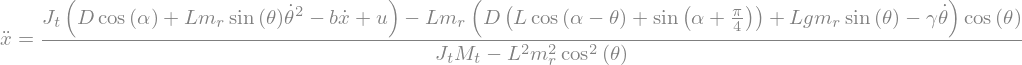

In [32]:
x_ddot_result = DDx_DDtheta_rozwiazanie[0].simplify()
smp.Eq(
    DDx,
    x_ddot_result
)

In [35]:
print_latex(smp.Eq(
    DDx,
    x_ddot_result
))

\frac{d^{2}}{d t^{2}} x{\left(t \right)} = \frac{J_{t} \left(D \cos{\left(\alpha{\left(t \right)} \right)} + L m_{r} \sin{\left(\theta{\left(t \right)} \right)} \left(\frac{d}{d t} \theta{\left(t \right)}\right)^{2} - b \frac{d}{d t} x{\left(t \right)} + u{\left(t \right)}\right) - L m_{r} \left(D \left(L \cos{\left(\alpha{\left(t \right)} - \theta{\left(t \right)} \right)} + \sin{\left(\alpha{\left(t \right)} + \frac{\pi}{4} \right)}\right) + L g m_{r} \sin{\left(\theta{\left(t \right)} \right)} - \gamma \frac{d}{d t} \theta{\left(t \right)}\right) \cos{\left(\theta{\left(t \right)} \right)}}{J_{t} M_{t} - L^{2} m_{r}^{2} \cos^{2}{\left(\theta{\left(t \right)} \right)}}


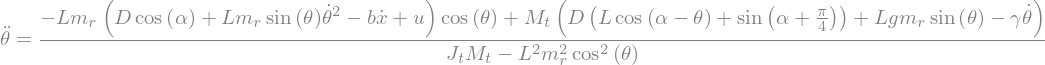

In [36]:
theta_ddot_result = DDx_DDtheta_rozwiazanie[1].simplify()
smp.Eq(
    DDtheta,
    theta_ddot_result
)

'State vector.'

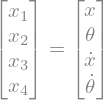

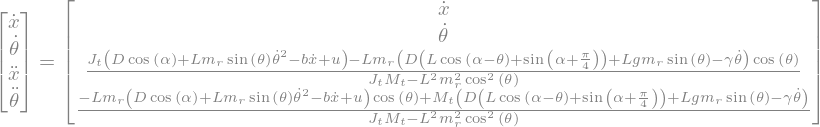

In [37]:
# State space representation
x1, x2, x3, x4 = smp.symbols('x_1 x_2 x_3 x_4', cls=smp.Function)
x1 = x1(t); x2 = x2(t); x3 = x3(t); x4 = x4(t) 

# state vector, x1 x2 x3 x4
state_vec = smp.Matrix([
    [x1],
    [x2],
    [x3],
    [x4]
])

# state vector, x theta ...
state_vec_noraml = smp.Matrix([
    [x],
    [theta],
    [Dx],
    [Dtheta]
])
disp('State vector.')
disp(
    smp.Eq(state_vec, state_vec_noraml)
)

# State equations
state_vec_diff = state_vec.diff(t)
state_vec_noraml_diff = state_vec_noraml.diff(t)

state_equations_normal = smp.Matrix([
    [Dx],
    [Dtheta],
    [x_ddot_result],
    [theta_ddot_result]
])
disp(
    smp.Eq(
        state_vec_noraml_diff,
        state_equations_normal
    )
)

# disp(
#     smp.Eq(
#         state_vec_diff,
#         state_equations.subs([(theta), ()])
#     )
# )

state_vec_noraml:


state_equations_normal:


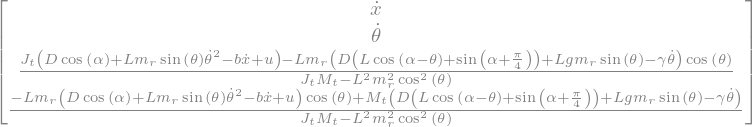

state_vec:


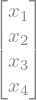

state_equations


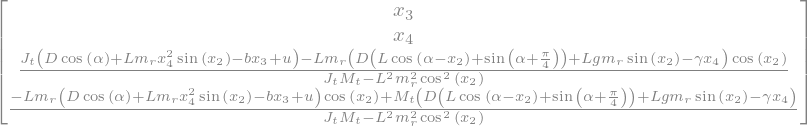

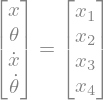

In [ ]:
# Sym. state vector: x theta Dx Dtheta "normal"
print('state_vec_noraml:')
disp(state_vec_noraml)

# Sym. state equations "normal"
print('state_equations_normal:')
disp(state_equations_normal)

# Sym. state vector: x1 x2 x3 x4
print('state_vec:')
disp(state_vec)

# Sym. równiania stanu w x-ach.
state_equations = state_equations_normal.subs([(Dx, x3),
                                               (Dtheta, x4),
                                               (x, x1),
                                               (theta, x2)])

print('state_equations')
disp(state_equations)

disp(
    smp.Eq(
        state_vec_noraml,
        state_vec
    )
)   

---
---
---

### <b> Pickling symbolic model


\begin{equation}
    \begin{split}
        & L = \frac{L_pm_p + L_cm_c}{m_r} \\
        & m_r = m_p + m_c \\
        & m_r = m_p + m_c \\
        & M_t = M+m_r \\
        & J_t = J_{cm} + m_rL^2 \\
        & J_{cm} = \frac{4}{3}m_p L_p^2 + m_cL_c^2 -L^2m_r 
    \end{split}
\end{equation}

DAE equations
    
\begin{equation}
    \begin{bmatrix}
        M_t & m_rL\cos(\theta)\\
        m_rL\cos(\theta) & J_t 
    \end{bmatrix}
    \begin{bmatrix}
        \ddot{x}\\
        \ddot{\theta}
    \end{bmatrix}
    +
    \begin{bmatrix}
        b\dot{x} - Lm_r\sin(\theta)\dot{\theta}^2\\
        \gamma\dot{\theta} - m_r g L\sin(\theta)
    \end{bmatrix}
    =
    \begin{bmatrix}
        u\\
        0
    \end{bmatrix}
    +
    \begin{bmatrix}
        \cos(\alpha)\\
        L\cos(\alpha-\theta) + \sin(\alpha + \frac{\pi}{4})
    \end{bmatrix}
\end{equation}

In [ ]:
model_constants = {'L': smp.Eq(L, L_cm_ramienia),
                    'm_r': smp.Eq(m_r, m_p+m_c),
                    'Mt': smp.Eq(Mt, M+m_r),
                    'Jt': smp.Eq(Jt, J_cm + m_r*L**2),
                    'Jcm': smp.Eq(J_cm, smp.Rational(4, 3) * m_p * L_p**2 + m_c*L_c**2 + m_r*L**2)}


L : 


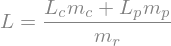

m_r : 


Mt : 


Jt : 


Jcm : 


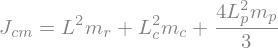

In [ ]:
for key, value in model_constants.items():
    print(key, ': ')
    disp(value)

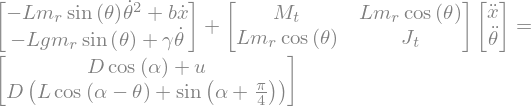

In [ ]:
DAE_model = smp.Eq(
    smp.Add( smp.MatMul(Am, Bm), Cm),
    smp.Add(smp.Add(Dm,Em)
    )
)
disp(DAE_model)

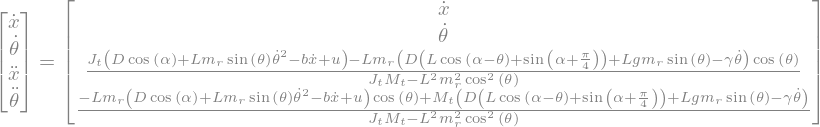

In [ ]:
ODE_model_var_natural = smp.Eq(state_vec_noraml_diff,
                               state_equations_normal)
disp(ODE_model_var_natural)

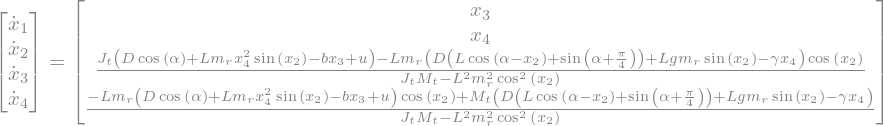

In [ ]:
ODE_model_var_x = smp.Eq(state_vec.diff(t, 1),
                         state_equations)
disp(ODE_model_var_x)

In [ ]:
content_to_save = {
    'model_constants': model_constants,
    'DAE_model': DAE_model,
    'ODE_model_var_natural': ODE_model_var_natural,
    'ODE_model_var_x': ODE_model_var_x    
}

In [ ]:
# '''
# Nie mogłem użyć pickle bo nie radził sobie z funkcjami w sympy
# '''
# import pickle
# # dump_string -> returns a string of binary format of the object
# # returned string contains serialized object
# saved_object_string = pickle.dumps(model_constants)
# # Deserializacja zapisanego obiektu
# # zwracana wartość jest 'deep copy' zapisanego obiektu
# loaded_obj_from_string = pickle.loads(saved_object_string)

In [ ]:
# conda install -c conda-forge dill
import dill

In [ ]:
with open('symbolicznyModelWahadla.pkl', 'wb') as f:
    dill.dump(
        content_to_save,
        file=f,
        protocol=dill.DEFAULT_PROTOCOL,
        recurse=True)

In [ ]:
with open('symbolicznyModelWahadla.pkl', 'rb') as f:
    content = dill.load(f)